In [109]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D

### read in results

In [16]:
model_cleaning = pd.read_csv('../results/results_cleaning_2D_n100_fitted_to_ts_2023-01-20.csv', header=0)
model_cooking = pd.read_csv('../results/results_tablesetting_cooking_2D_n100_fitted_to_ts_on_2023-01-20.csv')
model_ts = pd.read_csv('../results/results_tablesetting_2D_n100_fitted_to_ts_2023-06-22.csv')

In [17]:
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_cleaning_2022-10-11.txt', 'r') as file:
    nn_results_cleaning = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_cooking_2022-05-10.txt', 'r') as file:
    nn_results_cooking = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_all_2022-06-07.txt', 'r') as file:
    nn_results_ts = ast.literal_eval(file.read())

In [18]:
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_ts_cleaning_2022-10-11.txt', 'r') as file:
    rnn_results_cleaning = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_on_ts_results_cooking_2022-06-09.txt', 'r') as file:
    rnn_results_cooking = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_on_ts_all_2022-06-29.txt', 'r') as file:
    rnn_results_ts = ast.literal_eval(file.read())

### check lengths of files

In [19]:
len(model_cooking), len(nn_results_cooking), len(rnn_results_cooking)

(309, 314, 123)

In [20]:
len(model_cleaning), len(nn_results_cleaning), len(rnn_results_cleaning)

(17, 17, 17)

In [21]:
len(model_ts), len(nn_results_ts), len(rnn_results_ts)

(188, 309, 309)

### data wrangling to throw away unnecessary stuff

In [22]:
model_cooking = model_cooking[186:]

In [23]:
len(model_cooking)

123

In [24]:
model_ts = model_ts['c: 1.7; k: 0.2,0.3,1.2; xy'] # lowest error column

In [25]:
model_ts = model_ts[:186] # remove mean + median row

In [32]:
nn_results_ts_new = nn_results_ts[:186]
nn_results_cooking = nn_results_ts[186:]

In [33]:
rnn_results_ts = rnn_results_ts[:186]

In [35]:
len(rnn_results_ts), len(nn_results_ts_new), len(model_ts)

(186, 186, 186)

In [36]:
len(rnn_results_cooking), len(nn_results_cooking), len(model_cooking)

(123, 123, 123)

### build dataframes for plotting

In [49]:
model_results_cooking = model_cooking['median'].values

In [50]:
data_cooking = pd.DataFrame()
data_cooking['model'] = model_results_cooking
data_cooking['RNN text prediction'] = rnn_results_cooking
data_cooking['NN w/ spatial info'] = nn_results_cooking

In [51]:
data_ts = pd.DataFrame()
data_ts['model'] = model_ts
data_ts['RNN text prediction'] = rnn_results_ts
data_ts['NN w/ spatial info'] = nn_results_ts_new

In [59]:
data_cleaning = pd.DataFrame()
data_cleaning['model'] = model_cleaning['median']
data_cleaning['RNN text prediction'] = rnn_results_cleaning
data_cleaning['NN w/ spatial info'] = nn_results_cleaning

In [42]:
labels = [col for col in data_cooking.columns]

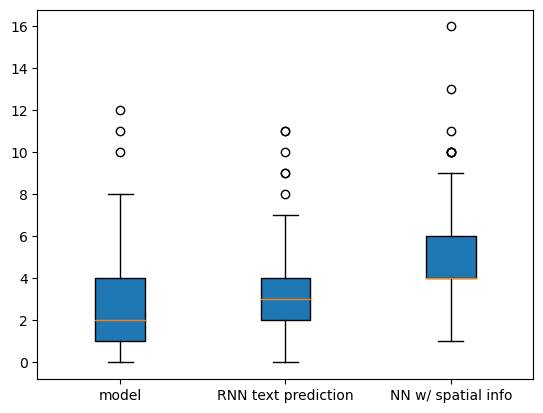

In [43]:
fig = plt.plot(figsize=(12,8))
fig = plt.boxplot(data_cooking, patch_artist=True, labels=labels)

In [44]:
sns.set(style="white")

/home/pwenzl/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pwenzl/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pwenzl/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


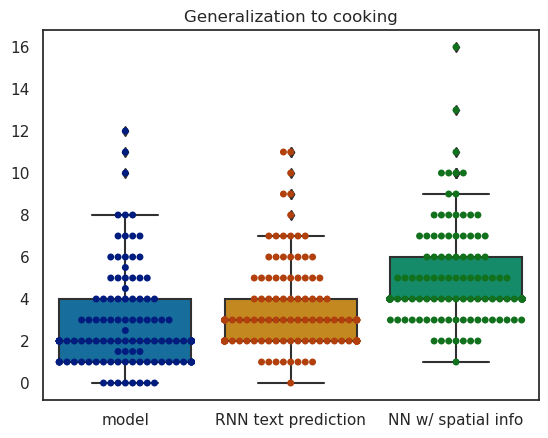

In [45]:
ax = sns.boxplot(data=data_cooking, palette="colorblind").set(title="Generalization to cooking")
ax = sns.swarmplot(data=data_cooking, palette="dark")

In [162]:
custom_cmap = ["lavender", "lightgreen", "lightskyblue"]

custom_lines = [Line2D([0], [0], color=custom_cmap[0], lw=4),
                Line2D([0], [0], color=custom_cmap[1], lw=4),
                Line2D([0], [0], color=custom_cmap[2], lw=4)]

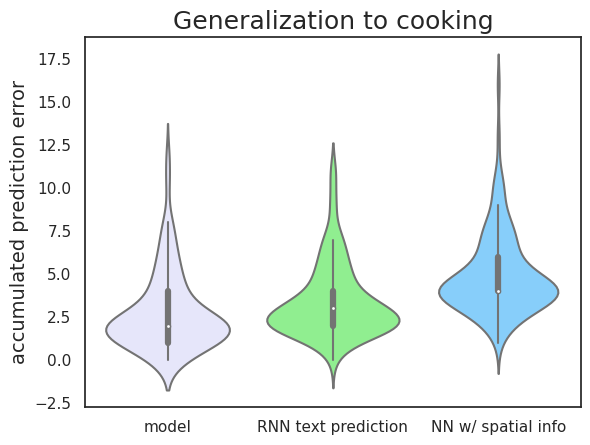

In [163]:
%matplotlib inline

ax = sns.violinplot(data=data_cooking, 
                    palette=custom_cmap,
                    saturation=1)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Generalization to cooking", fontsize=18)
plt.show()

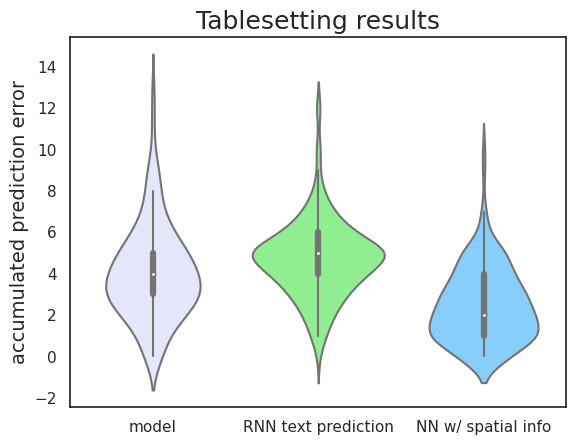

In [164]:
%matplotlib inline

ax = sns.violinplot(data=data_ts, 
                    palette=custom_cmap, 
                    saturation=1)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Tablesetting results", fontsize=18)
plt.show()

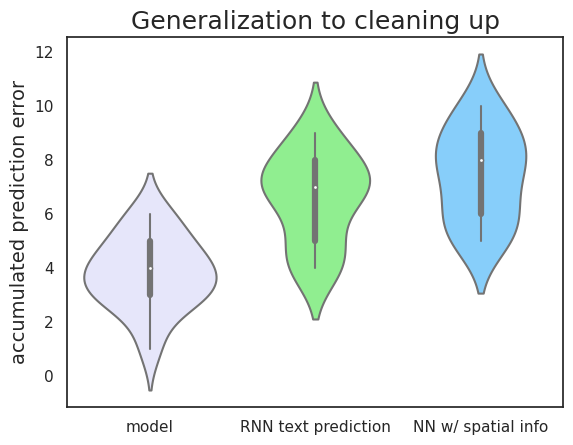

In [165]:
%matplotlib inline

ax = sns.violinplot(data=data_cleaning, 
                    palette=custom_cmap, 
                    saturation=1)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Generalization to cleaning up", fontsize=18)
plt.show()

In [174]:
%matplotlib qt

fig2, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(12,8))
sns.violinplot(data=data_ts, 
               palette=custom_cmap,
               saturation=.8,
               ax=ax1, 
               cut=0,
               inner='quartile')
ax1.set(xticklabels=[])
ax1.set_xlabel('table setting', fontsize=22)
ax1.set_ylabel("accumulated prediction error", fontsize=22)
for line in ax1.lines:
    line.set_color('darkred')

sns.violinplot(data=data_cooking, 
               palette=custom_cmap,
               saturation=.8,
               ax=ax2,
               cut=0,
               inner='quartile')
ax2.set(xticklabels=[])
ax2.set_xlabel('cooking', fontsize=22)
for line in ax2.lines:
    line.set_color('darkred')

sns.violinplot(data=data_cleaning, 
               palette=custom_cmap,
               saturation=.8,
               ax=ax3,
               cut=0,
               inner='quartile')
ax3.set(xticklabels=[])
ax3.set_xlabel('cleaning up', fontsize=22)
for line in ax3.lines:
    line.set_color('darkred')

ax3.legend(custom_lines, ['OPM', 'RNN', 'NN'], fontsize=20)

plt.show()